### Import cell
Import all required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns
import json
import copy


import os
import scripts.jupyter_functions as jf

%matplotlib inline

### Load data with pandas

In [2]:
### Edit the file path below to target the stat folder
filePath = "../pages/api/stats"
###

# Write down which parameter was varied in data
fileSelection = jf.selectFile(os.listdir(filePath))


Dropdown(description='Select the file to analyse:', index=33, layout=Layout(width='50%'), options=('20250304_1…

In [3]:
selected_file = fileSelection.value
print("Selected CVS file: ", selected_file)
data = pd.read_csv(os.path.join(filePath, selected_file,"stat.csv"))
columns_to_transform = ['timeMissedPicks', 'timeMissedDrops', 'workload', 'pickPerSlider']

for column in columns_to_transform:
  data[column] = data[column].apply(ast.literal_eval)


### Change here if you want to invert the display order or not
data = data[::-1]  # Reverse the order
####
# selected_variable = None

if 'selected_variable' not in locals():
  selected_variable = None
variableSelection = jf.selectFile(data.columns, selected_variable)

Selected CVS file:  finalspeedBouncingPremove


Dropdown(description='Select the file to analyse:', index=20, layout=Layout(width='50%'), options=('missedPick…

In [4]:
selected_variable = variableSelection.value
print("Selected variable: ", selected_variable)

params = json.load(open(os.path.join(filePath, selected_file, "params.json")))
nBeams = params["beam"]["nbOfBeams"]
rounding = 4


formatted_data = jf.format_data(selected_variable, nBeams, rounding, params, data)

try:
  xLabel = np.array([eval(val) for val in formatted_data[selected_variable].values])
  xLabel = np.around(xLabel, 2)
  xLabel_str = [f"[{x[0]}, {x[1]}]" for x in xLabel]
except:
  xLabel = formatted_data[selected_variable].values
  xLabel_str = xLabel

Selected variable:  conveyorSpeed


### Single run analysis

In [8]:
convertToArray = ['slidersVelocity','slidersAcceleration']
for col in convertToArray:
  data[col] = data[col].apply(ast.literal_eval)
  
slidersVelocity = np.array(data["slidersVelocity"].values[0])
slidersAcceleration = np.array(data["slidersAcceleration"].values[0])

data.drop(columns=["slidersVelocity","slidersAcceleration"])
slidersVelocity = slidersVelocity.swapaxes(1,2)
slidersAcceleration = slidersAcceleration.swapaxes(1,2)
accelerationTime = np.empty([slidersAcceleration.shape[0],slidersAcceleration.shape[1]-1])
cstVelTime = np.empty([slidersVelocity.shape[0],slidersVelocity.shape[1]-1])

AxisError: axis1: axis 1 is out of bounds for array of dimension 1

In [9]:
sliderMaxVel = np.empty(16,2)
sliderMaxAccel = np.empty(16,2)
for i in range(len(slidersVelocity)):
  for axis in range(len(slidersVelocity[i])-1):
    accelerationTime[i][axis] = np.flatnonzero(slidersAcceleration[i][axis] != 0).size
    temp1 = np.flatnonzero(slidersVelocity[i][axis] != 0)
    temp2 = np.flatnonzero(slidersAcceleration[i][axis] == 0)
    cstVelTime[i][axis] = len(np.intersect1d(temp1, temp2))
    # print(f"Acceleration time for slider {i} on axis {axis}: {accelerationTime[i][axis]} ({accelerationTime[i][axis]/len(slidersVelocity[i][0])}%)")
    # print(f"Cruising time for slider {i} on axis {axis}: {cstVelTime[i][axis]} ({cstVelTime[i][axis]/len(slidersVelocity[i][0])}%)")
# accelerationTime, cstVelTime 

TypeError: Cannot interpret '2' as a data type

In [10]:
pulseDuty = cstVelTime / (np.add(cstVelTime, accelerationTime))
transitionDuty= accelerationTime / (np.add(cstVelTime, accelerationTime))
fig, ax = plt.subplots(2, 1, figsize= (10,7))

width = 0.3
pos1 =np.arange(len(pulseDuty[:,0]))-width/2
pos2 =np.arange(len(pulseDuty[:,0]))+width/2

ax[0].bar(pos1, pulseDuty[:,0],width= 0.3, label="Constant velocity")
ax[0].bar(pos2, transitionDuty[:,0],width= 0.3, label="Acceleration/Deceleration")
ax[0].set_title("Duty cycle on axis X")
ax[0].set_ylabel("Duty cycle ratio")
ax[0].legend()
ax[1].bar(pos1, pulseDuty[:,1],width= 0.3)
ax[1].bar(pos2, transitionDuty[:,1],width= 0.3)
ax[1].set_title("Duty cycle on axis Y")
ax[1].set_xlabel("Slider ID")
ax[1].set_ylabel("Duty cycle ratio")
plt.subplots_adjust(hspace=.5)

NameError: name 'cstVelTime' is not defined

In [11]:
# Plot X coordinates
plt.figure(figsize=(10, 6))
# for i in range(slidersVelocity.shape[0]):
#     plt.plot(slidersVelocity[i, :, 0], label=f'Slider {i}')
plt.plot(slidersVelocity[7, 0, :], label=f'Slider {7}')
plt.title('Velocity_X of Sliders Over Time')
plt.xlabel('Time')
plt.ylabel('X Coordinate')
plt.legend()
plt.axhline(params["slider"]["speed"][0], color="red")
plt.axhline(-params["slider"]["speed"][0], color="red")
plt.show()

# Plot Y coordinates
plt.figure(figsize=(10, 6))
# for i in range(slidersVelocity.shape[0]):
#     plt.plot(slidersVelocity[i, :, 1], label=f'Slider {i}')
plt.plot(slidersVelocity[7, 1, :], label=f'Slider {7}')
plt.title('Velocity_Y of Sliders Over Time')
plt.xlabel('Time')
plt.axhline(params["slider"]["speed"][1], color="red")
plt.axhline(-params["slider"]["speed"][1], color="red")
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()


IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

<Figure size 1000x600 with 0 Axes>

In [12]:
# Plot X coordinates
plt.figure(figsize=(10, 6))
# for i in range(slidersAcceleration.shape[0]):
#     plt.plot(slidersAcceleration[i, :, 0], label=f'Slider {i}')
plt.plot(slidersAcceleration[7, 0, :], label=f'Slider {7}')
plt.title('Acceleration_X of Sliders Over Time')
plt.xlabel('Time')
plt.ylabel('X Coordinate')
plt.legend()
plt.axhline(params["slider"]["accel"][0], color="red")
plt.axhline(-params["slider"]["accel"][0], color="red")
plt.show()

# Plot Y coordinates
plt.figure(figsize=(10, 6))
# for i in range(slidersAcceleration.shape[0]):
#     plt.plot(slidersAcceleration[i, :, 1], label=f'Slider {i}')
plt.plot(slidersAcceleration[7, 1, :], label=f'Slider {7}')
plt.title('Acceleration_Y of Sliders Over Time')
plt.xlabel('Time')
plt.axhline(params["slider"]["accel"][1], color="red")
plt.axhline(-params["slider"]["accel"][1], color="red")
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()


IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

<Figure size 1000x600 with 0 Axes>

### Multiple runs analysis

#### Drop in range and kinematic 

C:\Users\Neizo\AppData\Local\Temp\ipykernel_12308\3345312459.py:8: RuntimeWarning: Mean of empty slice.
  plt.axhline(np.array(eval(data["dropsInRangePerT"].values[i]))[t_offset:].mean(), color ="orange")
c:\Users\Neizo\anaconda3\envs\isochronic\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


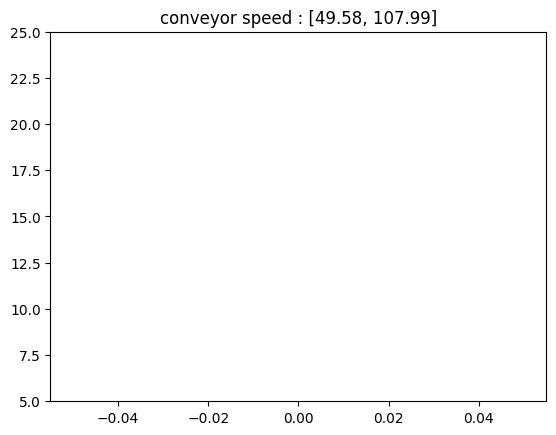

IndexError: list index out of range

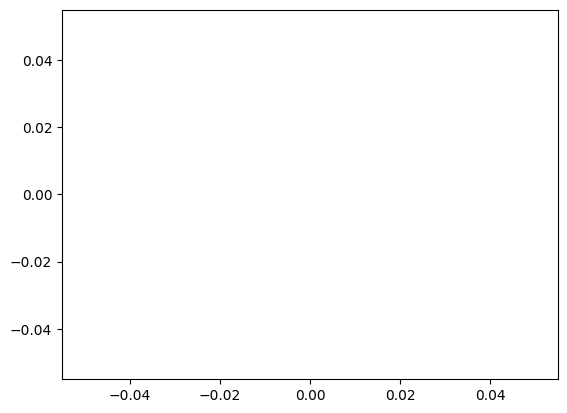

In [115]:
if len(formatted_data["missedPicks"].values) >10:
    print("Too many attributes to plot")
else:
  for i in range(0, len(data), 10):
    t_offset = 1500
    plt.plot(eval(data["dropsInRangePerT"].values[i])[t_offset:])
    plt.title(f"conveyor speed : {xLabel_str[i]}")
    plt.axhline(np.array(eval(data["dropsInRangePerT"].values[i]))[t_offset:].mean(), color ="orange")
    plt.ylim(5,25)
    plt.show()

In [ ]:
for i in range(0, len(data), 10):
  t_offset = 1500
  plt.plot(eval(data["dropsInRangePerT"].values[i])[t_offset:])
  plt.title(f"Extra distance : {xLabel_str[i]}")
  plt.axhline(np.array(eval(data["dropsInRangePerT"].values[i]))[t_offset:].mean(), color ="orange")
  plt.ylim(5,25)
  plt.show()

  # print(np.array(eval(data["dropsInRangePerT"].values[i]))[t_offset:].mean())

In [83]:
overlapping_val_mean = np.array([])
overlapping_val_std = np.array([])
reversed_data = data[::-1]
for i in range(len(reversed_data)):
  t_offset = 1500
  overlapping_val_mean = np.append(overlapping_val_mean, np.array(eval(reversed_data["dropsInRangePerT"].values[i])[t_offset:]).mean())
  overlapping_val_std = np.append(overlapping_val_std, np.array(eval(reversed_data["dropsInRangePerT"].values[i])[t_offset:]).std())
plt.plot(reversed_data["packagesExtraDist"].values,overlapping_val_mean)
plt.fill_between(reversed_data["packagesExtraDist"].values, overlapping_val_mean-overlapping_val_std, overlapping_val_mean+overlapping_val_std, alpha=0.5)
plt.show()

C:\Users\Neizo\AppData\Local\Temp\ipykernel_12308\2573775180.py:6: RuntimeWarning: Mean of empty slice.
  overlapping_val_mean = np.append(overlapping_val_mean, np.array(eval(reversed_data["dropsInRangePerT"].values[i])[t_offset:]).mean())
c:\Users\Neizo\anaconda3\envs\isochronic\lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Neizo\anaconda3\envs\isochronic\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Neizo\anaconda3\envs\isochronic\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


KeyError: 'packagesExtraDist'

#### Comparing two CSV

In [5]:
### Run this once

listData = [data]
listFormatedData = [formatted_data]
listFileName = [selected_file]

In [24]:
# Write down which parameter was varied in data
print(f"In data, there currently is/are {listFileName}")
fileSelection_new = jf.selectFile(os.listdir(filePath))

In data, there currently is/are ['finalspeedBouncingPremove', 'testFix1Speed', 'testFinal3']


Dropdown(description='Select the file to analyse:', index=35, layout=Layout(width='50%'), options=('20250304_1…

In [25]:
selected_file_new = fileSelection_new.value
print(f"In data, there currently is/are {listFileName}")

print("Selected CVS file: ", selected_file_new)
listFileName.append(selected_file_new)
data_new = pd.read_csv(os.path.join(filePath, selected_file_new,"stat.csv"))
columns_to_transform = ['timeMissedPicks', 'timeMissedDrops', 'workload', 'pickPerSlider']

for column in columns_to_transform:
  data_new[column] = data_new[column].apply(ast.literal_eval)


### Change here if you want to invert the display order or not
data_new = data_new[::-1]  # Reverse the order
####

listData.append(data_new)
if variableSelection.value in data_new.columns:
  print("Keeping the same variable : ", variableSelection.value)
else:
  print("Warning ! The previously selected value is not in the new data")
  variableSelection = jf.selectFile(data_new.columns)

In data, there currently is/are ['finalspeedBouncingPremove', 'testFix1Speed', 'testFinal3']
Selected CVS file:  testFix1SpeedNOPM
Keeping the same variable :  conveyorSpeed


In [26]:
# label = ["Without pre-move", "With pre-move on all beams", "With pre-move on outer beams"]
# label = ["No Premove","With pre-move on all beams", "With state-bouncing on all beams", "With state-bouncing and pre-move on all beams"]
label = ["without fix","with fix", "inital", "with fix no pre-move"]
# label = ["With state-bouncing and pre-move on all beam, and LPT-LIFO-LPT-FIFO", "Without both, and with LIFO-LPT-SPT-LPT"]

In [27]:
selected_variable = variableSelection.value
print("Selected variable: ", selected_variable)

params_new = json.load(open(os.path.join(filePath, selected_file, "params.json")))
nBeams_new = params_new["beam"]["nbOfBeams"]


formatted_data_new = jf.format_data(selected_variable, nBeams, rounding, params_new, data_new)
listFormatedData.append(formatted_data_new)
try:
  xLabel = np.array([eval(val) for val in formatted_data_new[selected_variable].values])
  xLabel = np.around(xLabel, 2)
  xLabel_str = [f"[{x[0]}, {x[1]}]" for x in xLabel]
except:
  xLabel = formatted_data_new[selected_variable].values
  xLabel_str = xLabel

Selected variable:  conveyorSpeed


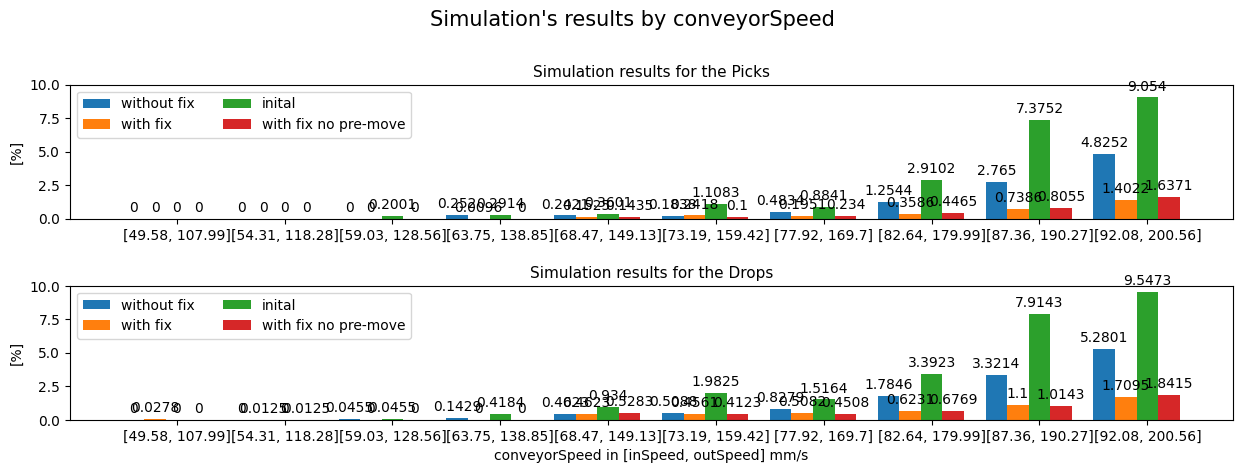

In [28]:
if len(formatted_data["missedPicks"].values) > 10:
    print("Too many attributes to plot")
else:
    yVals_Picks = {listFileName[i]: listFormatedData[i]["missedPicks"].values for i in range(len(listFormatedData))}
    yVals_Drops = {listFileName[i]: listFormatedData[i]["missedDrops"].values for i in range(len(listFormatedData))}
    x = np.arange(len(xLabel))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots(2, 1, figsize=(15, 5))  # Adjust the figsize here

    for i, (attribute, measurement) in enumerate(yVals_Picks.items()):
        offset = width * i
        rects = ax[0].bar(x + offset, measurement, width, label=label[i])
        ax[0].bar_label(rects, padding=3)
        
    ax[0].set_title(f"Simulation results for the Picks", fontsize=11)
    ax[0].set_xticks(x + width * len(yVals_Picks) / 2, xLabel_str)
    ax[0].legend(loc='upper left', ncols=2)
    ax[0].set_ylabel('[%]')
    ax[0].set_ylim(0, 10)

    for i, (attribute, measurement) in enumerate(yVals_Drops.items()):
        offset = width * i
        rects = ax[1].bar(x + offset, measurement, width, label=label[i])
        ax[1].bar_label(rects, padding=3)

    ax[1].set_title(f"Simulation results for the Drops", fontsize=11)
    ax[1].set_xticks(x + width * len(yVals_Picks) / 2, xLabel_str)
    ax[1].legend(loc='upper left', ncols=2)
    ax[1].set_ylabel('[%]')
    ax[1].set_ylim(0, 10)
    ax[1].set_xlabel(f"{selected_variable} in [inSpeed, outSpeed] mm/s")

    # Add some text for labels, title and custom x-axis tick labels, etc.
    fig.suptitle("Simulation's results by " + selected_variable, y=0.93, fontsize=15)
    fig.subplots_adjust(top=0.78)
    # fig.text(0.5,0.86,f"Simulation with {params['beam']['scheduling'][:nBeams]} scheduling", ha='center',fontsize=10)
    plt.subplots_adjust(hspace=0.5)
    plt.show()


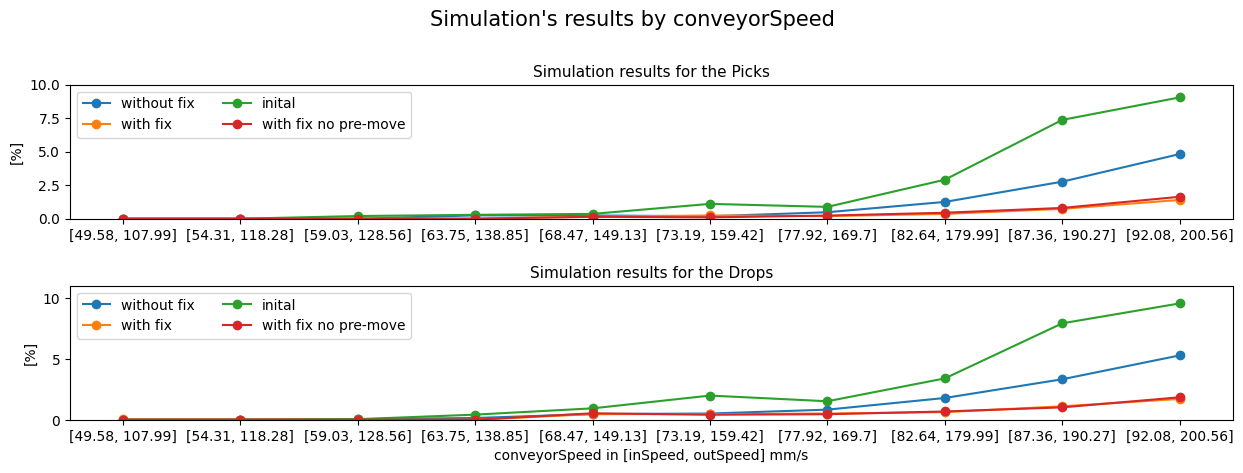

In [29]:
if len(formatted_data["missedPicks"].values) > 10:
  print("Too many attributes to plot")
else:
  yVals_Picks = {listFileName[i]: listFormatedData[i]["missedPicks"].values for i in range(len(listFormatedData))}
  yVals_Drops = {listFileName[i]: listFormatedData[i]["missedDrops"].values for i in range(len(listFormatedData))}
  x = np.arange(len(xLabel)) # the label locations

  fig, ax = plt.subplots(2, 1, figsize=(15, 5)) # Adjust the figsize here

  for i, (attribute, measurement) in enumerate(yVals_Picks.items()):
    ax[0].plot(x, measurement, label=label[i], marker='o')
    
  ax[0].set_title(f"Simulation results for the Picks", fontsize=11)
  ax[0].set_xticks(x)
  ax[0].set_xticklabels(xLabel_str)
  ax[0].legend(loc='upper left', ncols=2)
  ax[0].set_ylabel('[%]')
  ax[0].set_ylim(0, 10)

  for i, (attribute, measurement) in enumerate(yVals_Drops.items()):
    ax[1].plot(x, measurement, label=label[i], marker='o')

  ax[1].set_title(f"Simulation results for the Drops", fontsize=11)
  ax[1].set_xticks(x)
  ax[1].set_xticklabels(xLabel_str)
  ax[1].legend(loc='upper left', ncols=2)
  ax[1].set_ylabel('[%]')
  ax[1].set_ylim(0, 11)
  ax[1].set_xlabel(f"{selected_variable} in [inSpeed, outSpeed] mm/s")

  # Add some text for labels, title and custom x-axis tick labels, etc.
  fig.suptitle("Simulation's results by " + selected_variable, y=0.93, fontsize=15)

  fig.subplots_adjust(top=0.78)
  # fig.text(0.5,0.86,f"Simulation with {params['beam']['scheduling'][:nBeams]} scheduling", ha='center',fontsize=10)
  plt.subplots_adjust(hspace=0.5)
  plt.show()


In [18]:
for d in listFormatedData:
  bWorkload = []
  tWorkload = []
  for idx, row in d.iterrows():
    
    bWorkload.append(np.sum(np.abs(np.diff(row["workload"]))))
    tWorkload.append(np.sum(row["workload"]))
  d["bWorkload"] = bWorkload
  d["tWorkload"] = tWorkload

In [19]:
for i, d in enumerate(listFormatedData):
  print(f'The BW and TW {label[i].lower()} : {d["bWorkload"].mean()}, {d["tWorkload"].mean()}')

The BW and TW without fix : 1.012619516901987, 7.391584024436099
The BW and TW with fix : 1.3565473660785137, 7.642025682248514
The BW and TW inital : 0.8278086202467667, 6.147973029264792


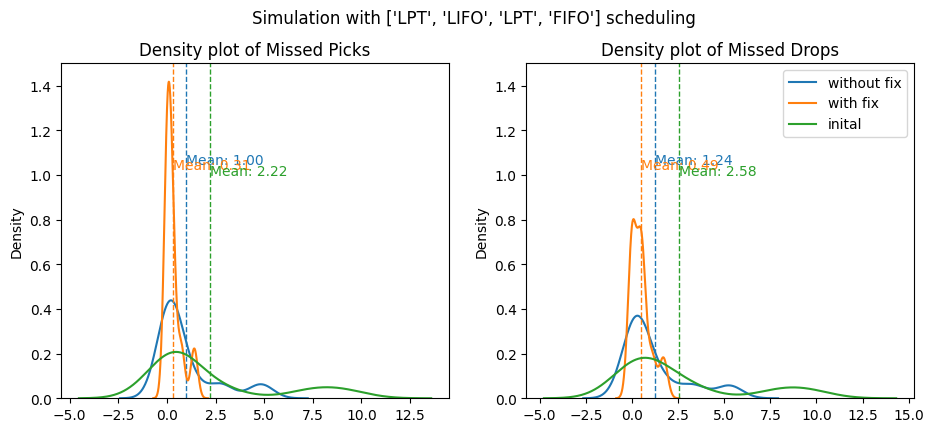

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(11, 5))
color = [ 'C0', 'C1', 'C2', 'C3']
for i in range(len(listFormatedData)):
  ylim = 1.5
  ax[0].set_ylim(0,ylim)
  ax[1].set_ylim(0,ylim)
  listFormatedData[i]['missedPicks'].plot.kde(ax=ax[0], title='Density plot of Missed Picks', label=label[i], bw_method=0.4)
  mean = listFormatedData[i]['missedPicks'].mean()
  ax[0].axvline(mean, color=color[i], linestyle='dashed', linewidth=1)
  ax[0].text(mean, ax[0].get_ylim()[1] * 0.7-0.025*i, f'Mean: {mean:.2f}', color=color[i])
  
  listFormatedData[i]['missedDrops'].plot.kde(ax= ax[1], title='Density plot of Missed Drops', label=label[i], bw_method=0.4)
  mean = listFormatedData[i]['missedDrops'].mean()
  ax[1].axvline(mean, color=color[i], linestyle='dashed', linewidth=1)
  ax[1].text(mean, ax[1].get_ylim()[1] * 0.7-0.025*i, f'Mean: {mean:.2f}', color=color[i])

fig.subplots_adjust(top=0.78)
fig.text(0.5,0.86,f"Simulation with {params['beam']['scheduling'][:nBeams]} scheduling", ha='center',fontsize=12)

plt.legend()
plt.show()

In [143]:
listNormalizedData = []
for d in listFormatedData:
  normalized_data = d.copy()
  listParam = ["missedDrops", "missedPicks", "unfilledPackages", "bWorkload", ]
  for param in listParam:
    # normalized_data[param] = (d[param] - d[param].mean())/d[param].std()
    normalized_data[param] = d[param]
    # normalized_data[param] = (d[param] - d[param].min())/(d[param].max() - formatted_data[param].min())
    
  # normalized_data["score"] = (1.1*normalized_data["missedDrops"] + 0.9*normalized_data["missedPicks"] + 0.5*normalized_data["bWorkload"] )
  # normalized_data["score"] = (normalized_data["missedDrops"] + normalized_data["missedPicks"] + normalized_data["bWorkload"] )
  normalized_data["score"] = (normalized_data["missedDrops"] + normalized_data["missedPicks"]  )
  # normalized_data["score"] = normalized_data["bWorkload"] 
  # normalized_data["score"] = ( normalized_data["missedPicks"] )
  # normalized_data["score"] = ( normalized_data["missedDrops"] )

  normalized_data = normalized_data.drop(columns=['workload', 'pickPerSlider', 'scheduling'])
  normalized_data = normalized_data[['missedPicks', 'missedDrops', 'unfilledPackages', 'score', 'bWorkload', 'tWorkload', 'beam_0', 'beam_1', 'beam_2', 'beam_3']]
  listNormalizedData.append(copy.deepcopy(normalized_data))

KeyError: "['scheduling'] not found in axis"

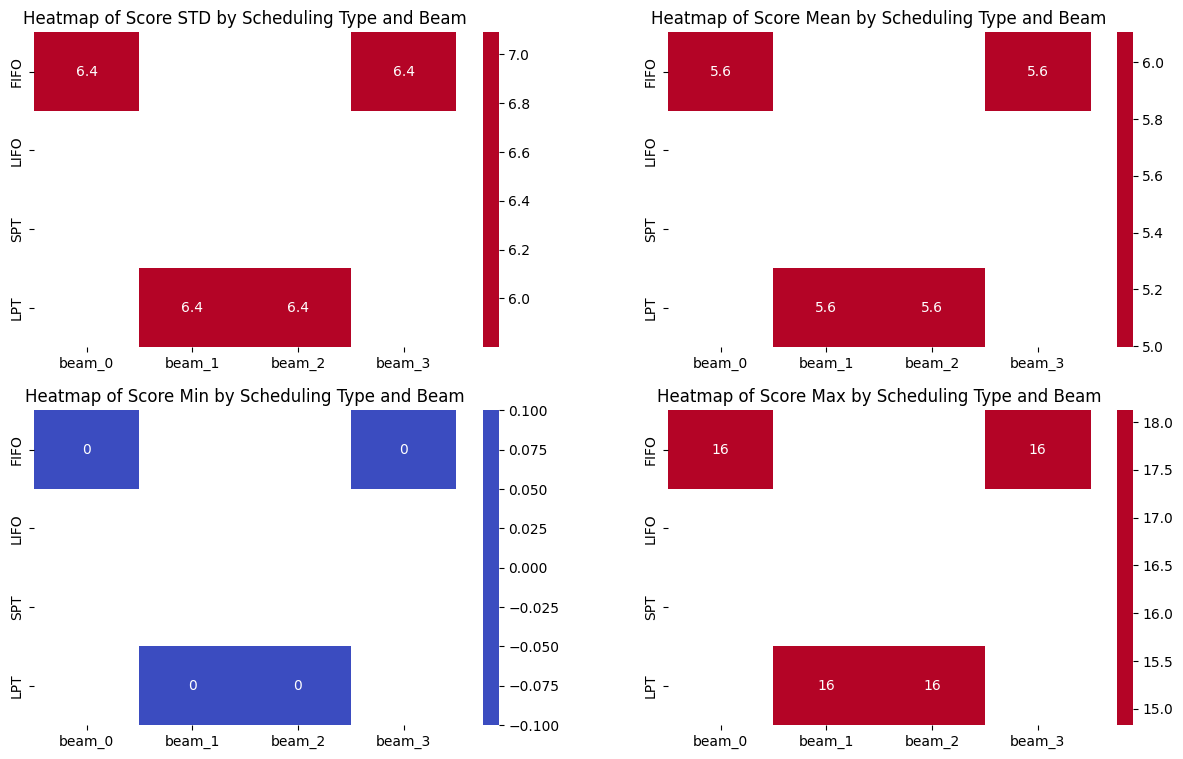

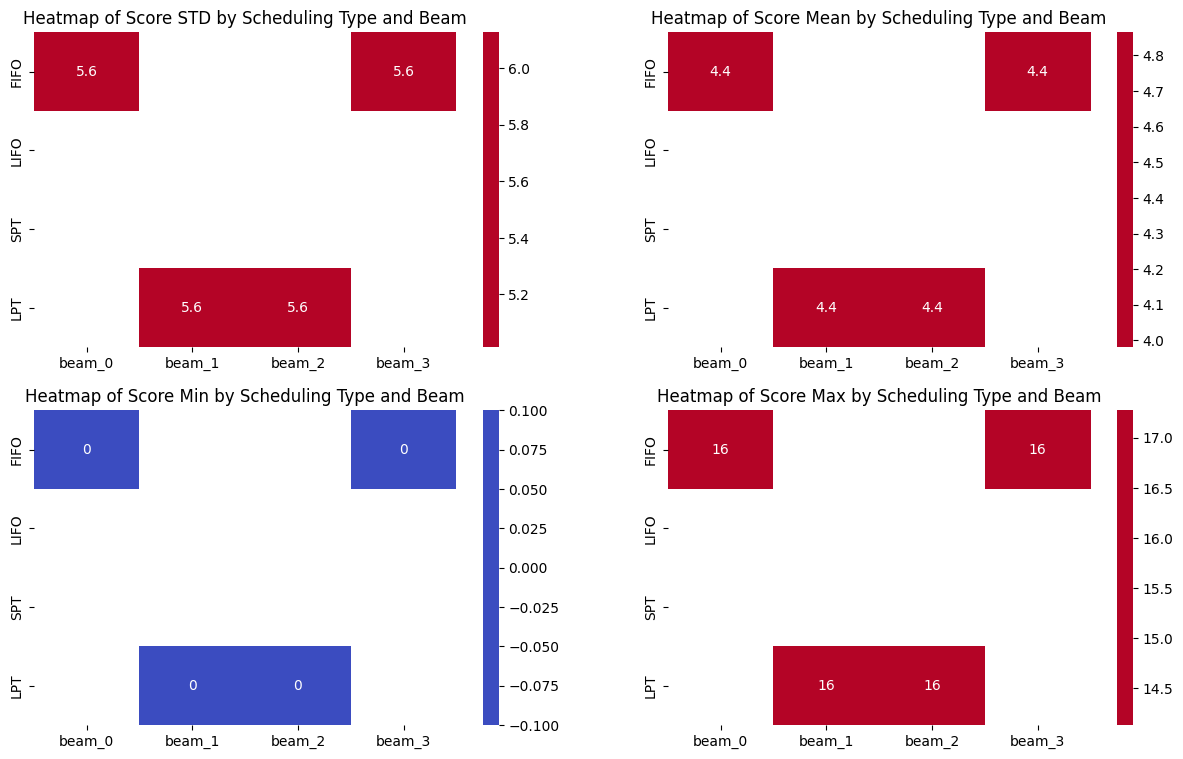

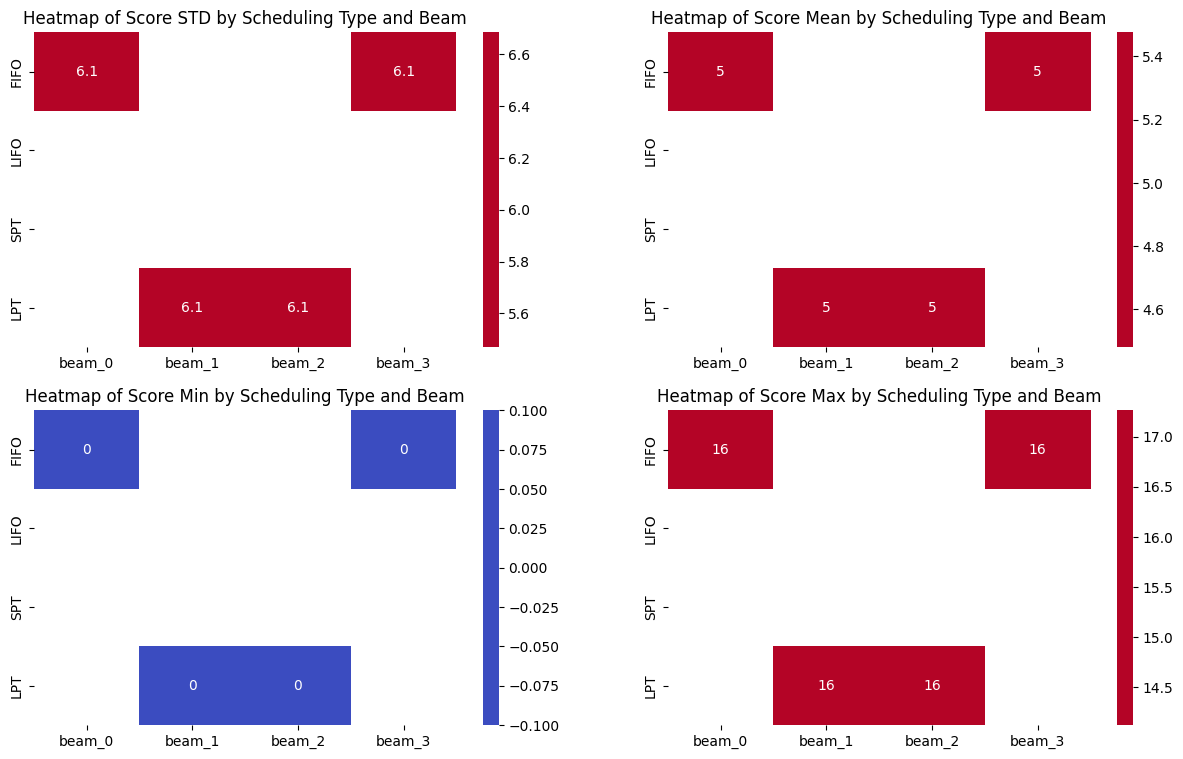

In [140]:
for d in listNormalizedData:
  scheduling_types = ["FIFO", "LIFO", "SPT", "LPT"]
  beams = ['beam_0', 'beam_1', 'beam_2', 'beam_3']

  # Initialize arrays to store the sums and max values
  score_std = np.zeros((len(scheduling_types), len(beams)))
  score_mean= np.zeros((len(scheduling_types), len(beams)))
  score_min = np.zeros((len(scheduling_types), len(beams)))
  score_max = np.zeros((len(scheduling_types), len(beams)))

  # Calculate the std and max values for each scheduling type and beam
  for i, sched_type in enumerate(scheduling_types):
    for j, beam in enumerate(beams):
      scores = d[d[beam] == sched_type]['score']
      score_std[i, j] = scores.std()
      score_mean[i, j] = scores.mean()
      score_min[i, j] = scores.min()
      score_max[i, j] = scores.max()

  # Create dataframes for the std and max values
  score_df_std = pd.DataFrame(score_std, index=scheduling_types, columns=beams)
  score_df_mean = pd.DataFrame(score_mean, index=scheduling_types, columns=beams)
  score_df_min = pd.DataFrame(score_min, index=scheduling_types, columns=beams)
  score_df_max = pd.DataFrame(score_max, index=scheduling_types, columns=beams)

  # Plot heatmaps
  fig, ax = plt.subplots(2, 2, figsize=(15, 9))
  sns.heatmap(score_df_std, annot=True, cmap="coolwarm", center=0, ax=ax[0,0]) 
  ax[0,0].set_title('Heatmap of Score STD by Scheduling Type and Beam')

  sns.heatmap(score_df_mean, annot=True, cmap="coolwarm", center=0, ax=ax[0,1])
  ax[0,1].set_title('Heatmap of Score Mean by Scheduling Type and Beam')
  sns.heatmap(score_df_min, annot=True, cmap="coolwarm", center=0, ax=ax[1,0])
  ax[1,0].set_title('Heatmap of Score Min by Scheduling Type and Beam')
  sns.heatmap(score_df_max, annot=True, cmap="coolwarm", center=0, ax=ax[1,1])
  ax[1,1].set_title('Heatmap of Score Max by Scheduling Type and Beam')

In [1]:
for d in listNormalizedData:
  def highlight_min(s):
    if s.name == selected_variable:
      return [''] * len(s)
    if "beam" in s.name :
      return ['color: dodgerblue' if v == 'FIFO' else 'color: hotpink' if v == 'LIFO' else 'color: green' if v == 'SPT' else 'color: yellow' for v in s]
    if s.name in ("bWorkload"):
      is_min =  s < s.quantile(0.4)
      return ['color: green' if v else '' for v in is_min]
    is_min = s < s.quantile(0.1)
    return ['color: green' if v else '' for v in is_min]

  pd.set_option('display.max_rows', None)
  # display(d.style.apply(highlight_min, axis=0))
  # sorted_normalized_data = d.sort_values(by=[ 'beam_0', 'score'], ascending=[True, True])
  sorted_normalized_data = d.sort_values(by=[ 'score'], ascending=[ True])
  # sorted_normalized_data = d.sort_values(by=[ 'beam_0'], ascending=[ True])
  display(sorted_normalized_data.style.apply(highlight_min, axis=0))

NameError: name 'listNormalizedData' is not defined

In [ ]:
beam0Scheduling = ["FIFO", "LIFO", "SPT", "LPT"]
beam1Scheduling = ["FIFO", "LIFO", "SPT", "LPT"] # on peut ressayer avec FIFO ICI
beam2Scheduling = ["LIFO", "SPT", "LPT"] # on peut ressayer avec LIFO ICI
beam3Scheduling = ["FIFO", "SPT", "LPT"]
tempScheduling = np.array(np.meshgrid(beam0Scheduling, beam1Scheduling, beam2Scheduling, beam3Scheduling)).T.reshape(-1, 4)
scheduling = tempScheduling.tolist()
temp1 = np.argwhere(tempScheduling.T[1] == "LPT")
temp2 = np.argwhere(tempScheduling.T[2] == "LPT")
# temp3 = np.argwhere(tempScheduling.T[2] == "FIFO")
# temp4 = np.argwhere(tempScheduling.T[3] == "FIFO")

# IDs to remove
ids_to_remove = np.intersect1d(temp1, temp2)
# ids_to_remove_2 = np.intersect1d(temp3, temp4)
# ids_to_remove = np.concatenate((ids_to_remove, ids_to_remove_2))
scheduling = np.delete(scheduling, ids_to_remove, axis=0)
nRuns = len(scheduling)
nRuns

In [ ]:
beam0Scheduling = ["FIFO", "LIFO", "SPT", "LPT"]
beam1Scheduling = ["FIFO"] # on peut ressayer avec FIFO ICI
beam2Scheduling = ["LIFO", "SPT", "LPT"]

beam1SchedulingBIS = ["LIFO", "SPT", "LPT"] # on peut ressayer avec FIFO ICI
beam2SchedulingBIS = ["LIFO"]
beam3Scheduling = ["FIFO", "SPT", "LPT"]
tempScheduling = np.array(np.meshgrid(beam0Scheduling, beam1Scheduling, beam2Scheduling, beam3Scheduling)).T.reshape(-1, 4)
tempSchedulingBIS = np.array(np.meshgrid(beam0Scheduling, beam1SchedulingBIS, beam2SchedulingBIS, beam3Scheduling)).T.reshape(-1, 4)
scheduling = tempScheduling.tolist()
# temp1 = np.argwhere(tempScheduling.T[1] == "LPT")
# temp2 = np.argwhere(tempScheduling.T[2] == "LPT")
# # temp3 = np.argwhere(tempScheduling.T[2] == "FIFO")
# # temp4 = np.argwhere(tempScheduling.T[3] == "FIFO")

# # IDs to remove
# ids_to_remove = np.intersect1d(temp1, temp2)
# # ids_to_remove_2 = np.intersect1d(temp3, temp4)
# # ids_to_remove = np.concatenate((ids_to_remove, ids_to_remove_2))
# scheduling = np.delete(scheduling, ids_to_remove, axis=0)
nRuns = len(scheduling)
nRuns

In [ ]:
len(np.concatenate((tempScheduling, tempSchedulingBIS), axis=0))

#### Single CSV analysis

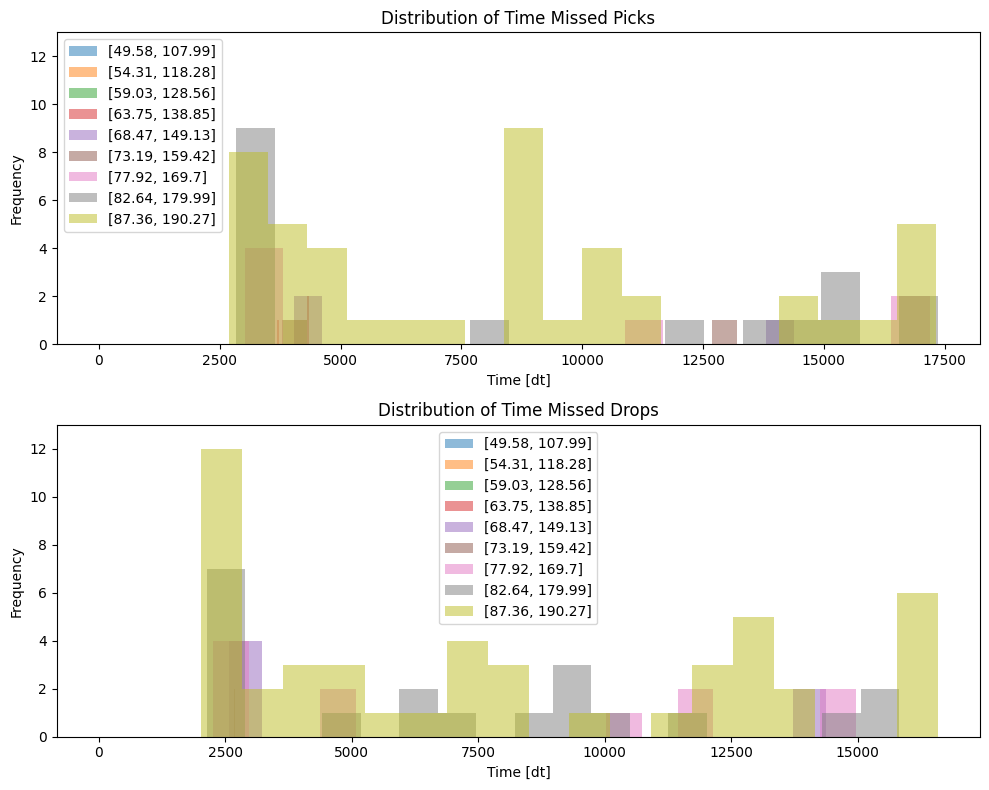

In [410]:
if len(formatted_data["missedPicks"].values) >20:
    print("Too many attributes to plot")
else:
    tMissedPicks = [[] for _ in range(len(data[selected_variable].unique()))]
    tMissedDrops = [[] for _ in range(len(data[selected_variable].unique()))]

    for idx, speeds in enumerate(data[selected_variable].unique()):
        tMissedPicks[idx].append(data[data[selected_variable] == speeds]["timeMissedPicks"].values[0])
        tMissedDrops[idx].append(data[data[selected_variable] == speeds]["timeMissedDrops"].values[0])

    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    # Plot distribution of time missed picks
    for idx, speeds in enumerate(data[selected_variable].unique()[:-1]):
        ax[0].hist(tMissedPicks[idx], bins=18, alpha=0.5, label=f'{xLabel_str[idx]}')

    ax[0].set_title('Distribution of Time Missed Picks')
    ax[0].set_xlabel('Time [dt]')
    ax[0].set_ylabel('Frequency')
    ax[0].legend()
    ax[0].set_ylim(0,13)

    # Plot distribution of time missed drops
    for idx, speeds in enumerate(data[selected_variable].unique()[:-1]):
        ax[1].hist(tMissedDrops[idx], bins=18, alpha=0.5, label=f'{xLabel_str[idx]}')

    ax[1].set_title('Distribution of Time Missed Drops')
    ax[1].set_xlabel('Time [dt]')
    ax[1].set_ylabel('Frequency')
    ax[1].legend()
    ax[1].set_ylim(0,13)

    plt.tight_layout()
    plt.show()
    # TODO CHANGE TO DENSITY PLOT MAYBE

C:\Users\Neizo\AppData\Local\Temp\ipykernel_3516\4102113466.py:25: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(tMissedDrops[idx][0], ax=ax[1], label=f'{xLabel_str[idx]}', fill=True)


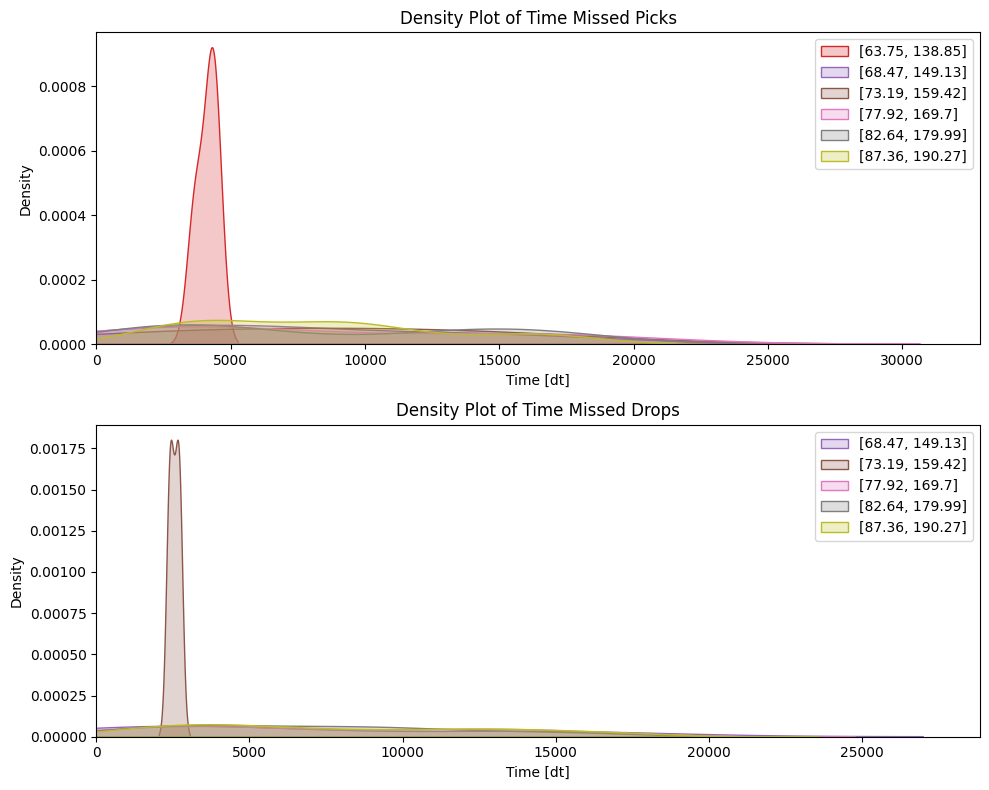

In [413]:
if len(formatted_data["missedPicks"].values) > 20:
  print("Too many attributes to plot")
else:
  tMissedPicks = [[] for _ in range(len(data[selected_variable].unique()))]
  tMissedDrops = [[] for _ in range(len(data[selected_variable].unique()))]

  for idx, speeds in enumerate(data[selected_variable].unique()):
    tMissedPicks[idx].append(data[data[selected_variable] == speeds]["timeMissedPicks"].values[0])
    tMissedDrops[idx].append(data[data[selected_variable] == speeds]["timeMissedDrops"].values[0])

  fig, ax = plt.subplots(2, 1, figsize=(10, 8))

  # Plot density of time missed picks
  for idx, speeds in enumerate(data[selected_variable].unique()[:-1]):
    sns.kdeplot(tMissedPicks[idx][0], ax=ax[0], label=f'{xLabel_str[idx]}', fill=True)

  ax[0].set_title('Density Plot of Time Missed Picks')
  ax[0].set_xlabel('Time [dt]')
  ax[0].set_ylabel('Density')
  ax[0].legend()
  ax[0].set_xlim(left=0)

  # Plot density of time missed drops
  for idx, speeds in enumerate(data[selected_variable].unique()[:-1]):
    sns.kdeplot(tMissedDrops[idx][0], ax=ax[1], label=f'{xLabel_str[idx]}', fill=True)

  ax[1].set_title('Density Plot of Time Missed Drops')
  ax[1].set_xlabel('Time [dt]')
  ax[1].set_ylabel('Density')
  ax[1].legend()
  ax[1].set_xlim(left=0)

  plt.tight_layout()
  plt.show()


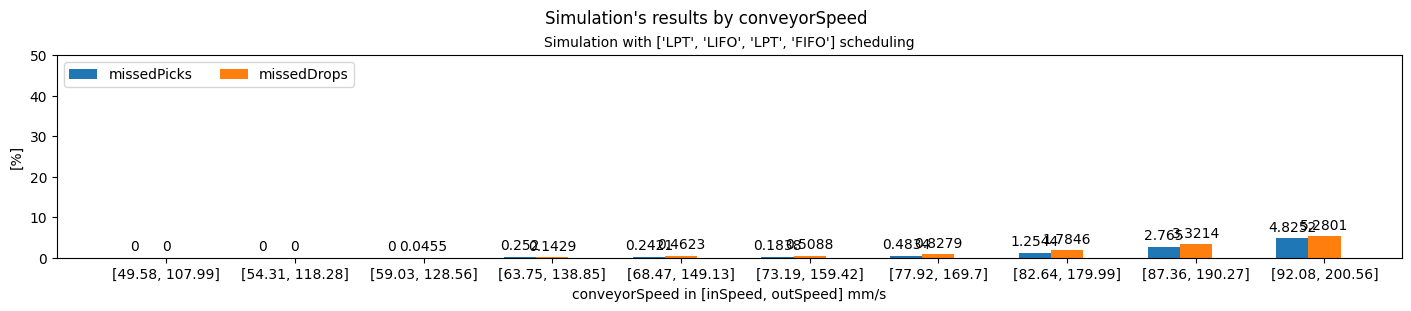

In [382]:
if len(formatted_data["missedPicks"].values) > 20:
    print("Too many attributes to plot")
else:
    yVals = {
        'missedPicks': formatted_data["missedPicks"].values,
        'missedDrops': formatted_data["missedDrops"].values,
        # 'unfilledPackages': formatted_data["unfilledPackages"].values,
    }
    x = np.arange(len(xLabel))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(figsize=(14, 3), layout='constrained')  # Adjust the figsize here

    for attribute, measurement in yVals.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    fig.suptitle("Simulation's results by " + selected_variable)
    ax.set_title(f"Simulation with {params['beam']['scheduling'][:nBeams]} scheduling", fontsize=10)
    ax.set_xticks(x + width, xLabel_str)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylabel('[%]')
    ax.set_xlabel(f"{selected_variable} in [inSpeed, outSpeed] mm/s")
    ax.set_ylim(0, 50)

    plt.show()

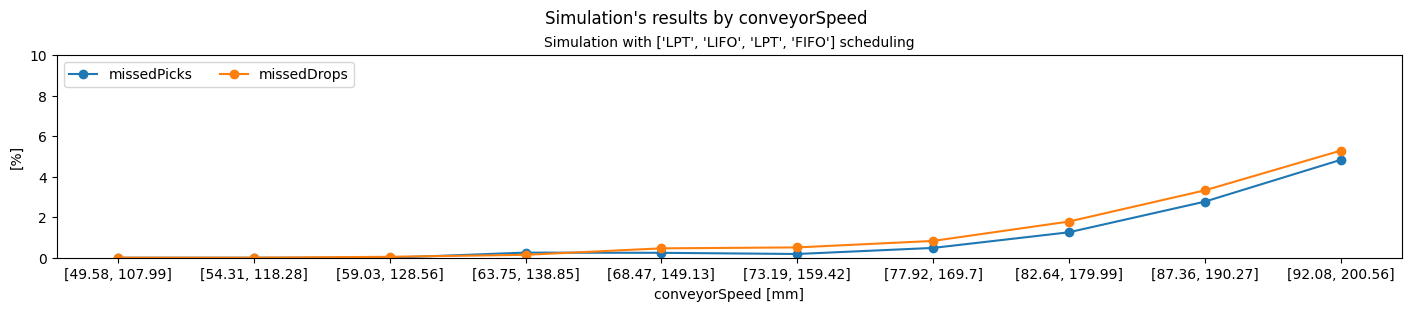

In [383]:
if len(formatted_data["missedPicks"].values) >20:
    print("Too many attributes to plot")
else:
    yVals = {
        'missedPicks': formatted_data["missedPicks"].values,
        'missedDrops': formatted_data["missedDrops"].values,
        # 'unfilledPackages': formatted_data["unfilledPackages"].values,
    }
    x = np.arange(len(xLabel))  # the label locations

    fig, ax = plt.subplots(figsize=(14, 3), layout='constrained')  # Adjust the figsize here

    for attribute, measurement in yVals.items():
        ax.plot(x, measurement, label=attribute, marker='o')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    fig.suptitle("Simulation's results by " + selected_variable)
    ax.set_title(f"Simulation with {params['beam']['scheduling'][:nBeams]} scheduling", fontsize=10)
    ax.set_xticks(x, xLabel_str)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylabel('[%]')
    ax.set_xlabel(f"{selected_variable} [mm]")
    # ax.set_xlabel(f"{selected_variable} in [inSpeed, outSpeed] mm/s")
    ax.set_ylim(0, 10)

    plt.show()

In [384]:
def highlight_min(s):
  if s.name == selected_variable:
    return [''] * len(s)
  is_min = s < s.quantile(0.1)
  return ['color: green' if v else '' for v in is_min]

pd.set_option('display.max_rows', None)
display(formatted_data[['missedPicks', 'missedDrops', 'unfilledPackages', selected_variable]].style.apply(highlight_min, axis=0))
print(f"Average missed picks: {formatted_data['missedPicks'].mean()}, and the minimum is {formatted_data['missedPicks'].min()}")
print(f"Average missed picks: {formatted_data['missedDrops'].mean()}, and the minimum is {formatted_data['missedDrops'].min()}")

,missedPicks,missedDrops,unfilledPackages,conveyorSpeed
0,0.000000,0.000000,0.000000,"[49.58333333333333, 107.99249999999999]"
1,0.000000,0.000000,0.000000,"[54.30555555555555, 118.27749999999999]"
2,0.000000,0.045500,0.454500,"[59.02777777777777, 128.5625]"
3,0.252000,0.142900,1.428600,"[63.74999999999999, 138.8475]"
4,0.242100,0.462300,4.622600,"[68.47222222222221, 149.1325]"
5,0.183800,0.508800,4.912300,"[73.19444444444443, 159.4175]"
6,0.483400,0.827900,6.229500,"[77.91666666666667, 169.70250000000001]"
7,1.254400,1.784600,14.923100,"[82.63888888888889, 179.9875]"
8,2.765000,3.321400,26.500000,"[87.36111111111111, 190.2725]"
9,4.825200,5.280100,39.253800,"[92.08333333333333, 200.5575]"


Average missed picks: 1.00059, and the minimum is 0.0
Average missed picks: 1.23735, and the minimum is 0.0


### Workload 

The workload represents how much a slider has worked, over the duration of the simulation, with 
$$W_k = \frac{Total\_travel\_time}{Simulation\_duration}$$
As such, the workload is a percentage. 
<!-- The higher the value, the better, as it means we aren't wasting time, -->

The balanced workload (BW) and the total workload (TW) are also computed and displayed per run, as an average. The lower these two values are, the better
$$BW = \sum_{k=1}^{nSliders-1}{|W_k - W_{k-1}|}  $$
$$TW = \sum_{k=0}^{nSliders-1}{W_k}$$


In [403]:
bWorkload = []
tWorkload = []
for idx, row in formatted_data.iterrows():
  
  bWorkload.append(np.sum(np.abs(np.diff(row["workload"]))))
  tWorkload.append(np.sum(row["workload"]))
formatted_data["bWorkload"] = bWorkload
formatted_data["tWorkload"] = tWorkload

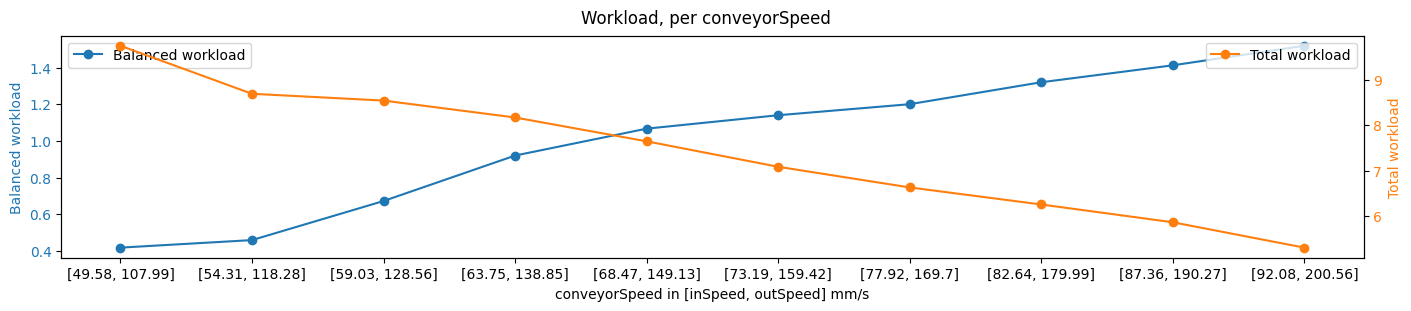

In [404]:
if len(formatted_data["missedPicks"].values) > 20:
    print("Too many attributes to plot")
else:
  fig, ax1 = plt.subplots(figsize=(14, 3), layout='constrained')

  ax2 = ax1.twinx()
  ax1.plot(formatted_data["bWorkload"], label="Balanced workload", marker='o', color='C0')
  ax2.plot(formatted_data["tWorkload"], label="Total workload", marker='o', color='C1')

  ax1.set_xlabel(f"{selected_variable} in [inSpeed, outSpeed] mm/s")
  ax1.set_ylabel('Balanced workload', color='C0')
  ax2.set_ylabel('Total workload', color='C1')

  ax1.set_xticks(x)
  ax1.set_xticklabels(xLabel_str)
  ax1.tick_params(axis='y', labelcolor='C0')
  ax2.tick_params(axis='y', labelcolor='C1')
  fig.suptitle("Workload, per conveyorSpeed")
  ax1.legend(loc='upper left')
  ax2.legend(loc='upper right')

  plt.show()

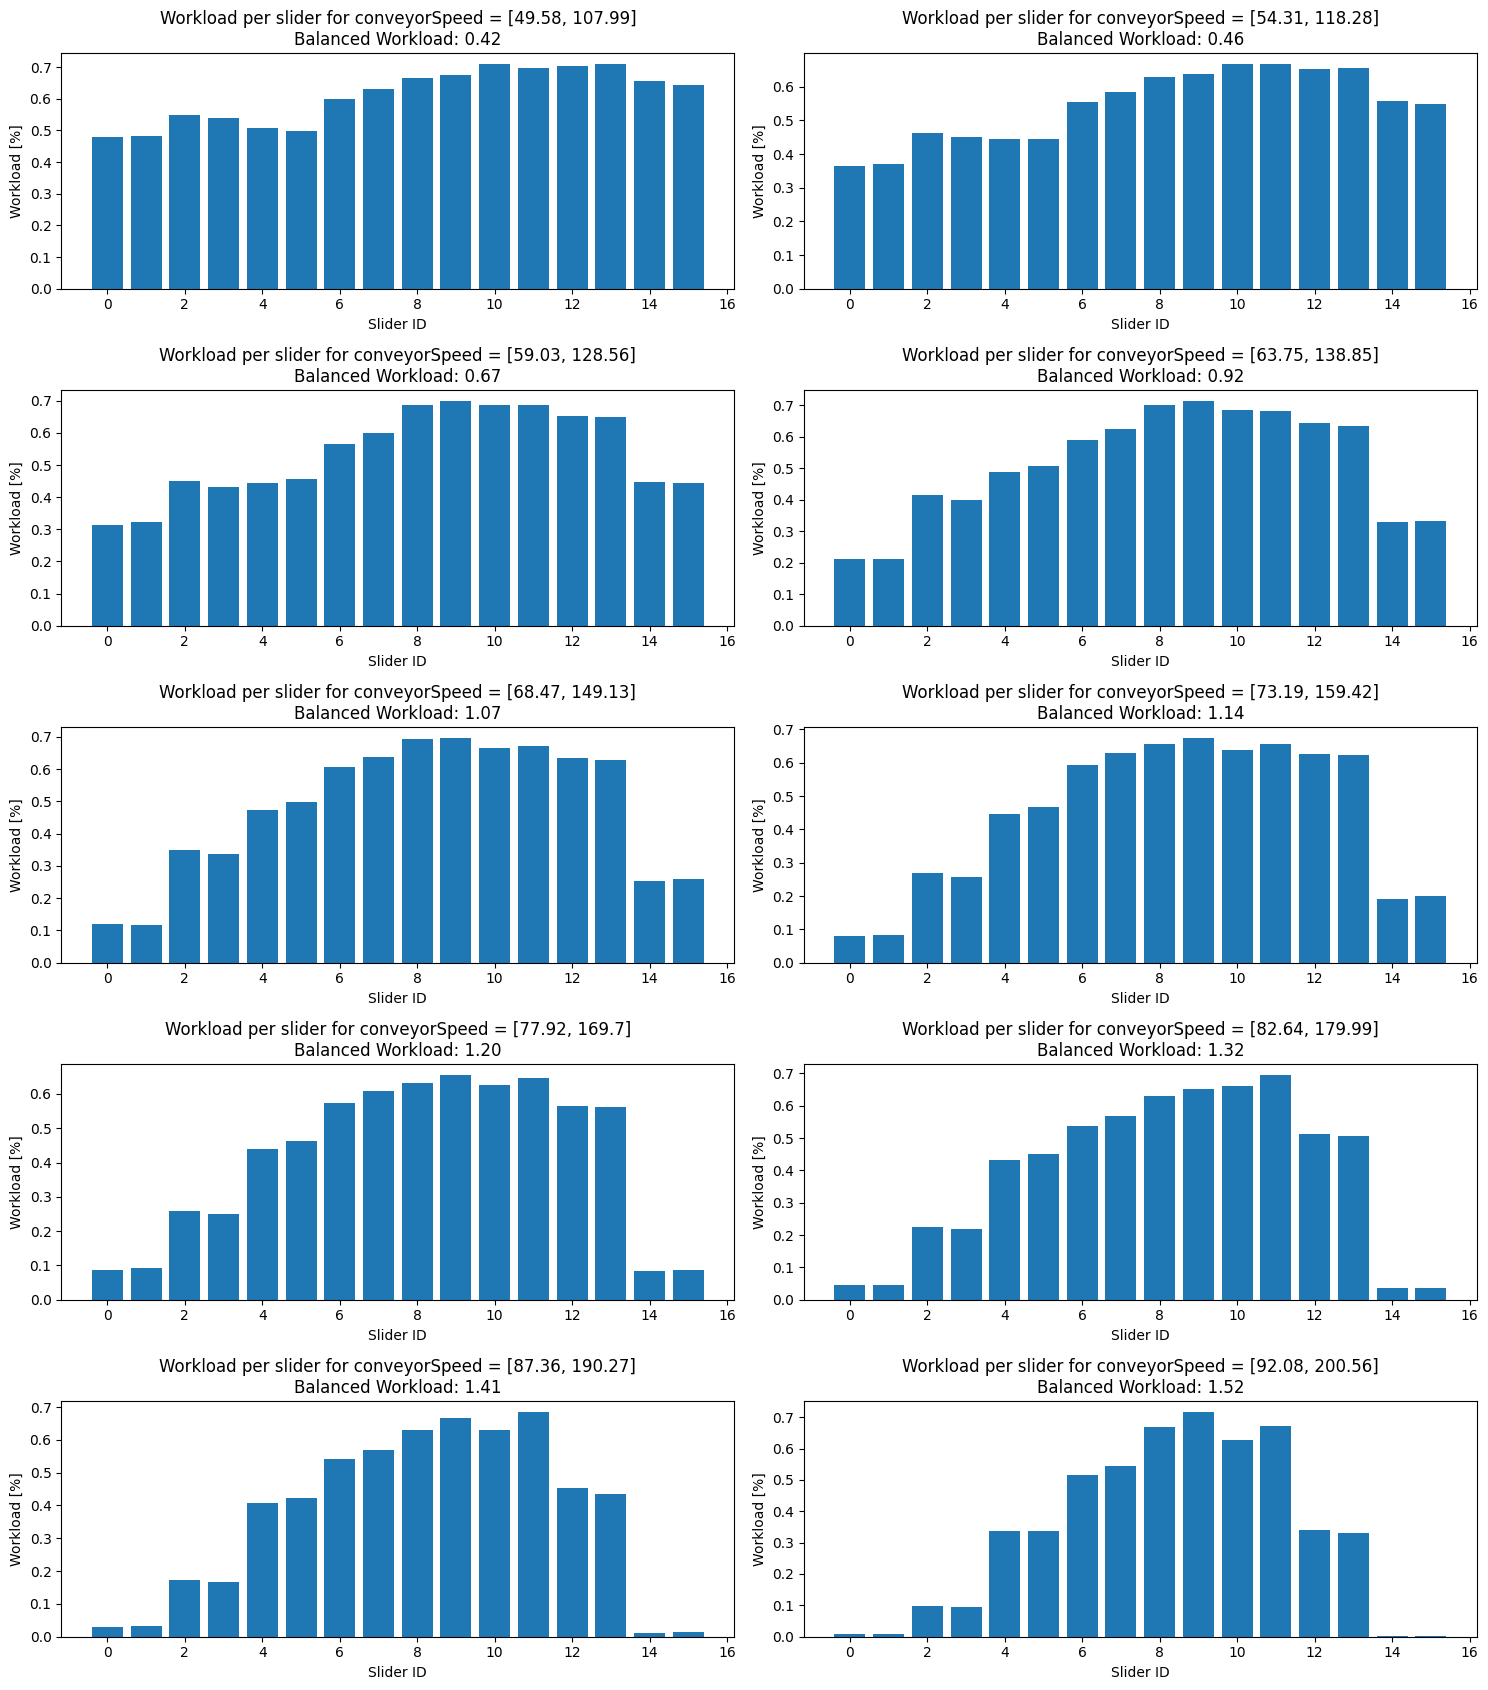

In [405]:
if len(formatted_data["missedPicks"].values) >10:
    print("Too many attributes to plot")
else:
  # fig, axes = plt.subplots(nrows=len(formatted_data), ncols=1, figsize=(10, 5 * len(formatted_data)))
  fig, axes = plt.subplots(nrows=len(formatted_data)//2, ncols=2, figsize=(15, 1.7 * len(formatted_data)))

  for idx, row in formatted_data.iterrows():
    ax = axes[idx//2,idx%2] if len(formatted_data) > 1 else axes
    # ax = axes[idx] if len(formatted_data) > 1 else axes
    ax.bar(range(len(row["workload"])), row["workload"])
    
    ax.set_title(f'Workload per slider for {selected_variable} = {xLabel_str[idx]}\n'
                +f"Balanced Workload: {row['bWorkload']:.2f}")
    ax.set_ylabel('Workload [%]')
    ax.set_xlabel('Slider ID')
    

  plt.tight_layout()
  plt.show()

In [335]:
pd.DataFrame({"Balanced Workload": bWorkload, "Total Workload": tWorkload, selected_variable: xLabel_str})

,Balanced Workload,Total Workload,scheduling
0,0.981272,8.096318,"['LPT', 'LPT', 'LPT', 'LPT']"
1,1.065668,8.196400,"['LPT', 'SPT', 'LPT', 'LPT']"
2,1.024575,8.058983,"['LPT', 'LIFO', 'LPT', 'LPT']"
3,1.237252,7.846381,"['LPT', 'FIFO', 'LPT', 'LPT']"
4,0.945823,8.108704,"['SPT', 'LPT', 'LPT', 'LPT']"
5,1.034485,8.174257,"['SPT', 'SPT', 'LPT', 'LPT']"
6,0.991055,8.063459,"['SPT', 'LIFO', 'LPT', 'LPT']"
7,1.229444,7.885653,"['SPT', 'FIFO', 'LPT', 'LPT']"
8,0.979418,8.077806,"['LIFO', 'LPT', 'LPT', 'LPT']"
9,1.057364,8.138935,"['LIFO', 'SPT', 'LPT', 'LPT']"


### Pick rate per slider

The following plot showcases the pick rate per minute of each slider, for each variant of the parameter chosen.
Again, all these values are averages over 10 runs with the same conditions.

The red line showcases the theoretical maximum average pick rate, and the orange one shows the actual one.

In [336]:
if len(formatted_data["missedPicks"].values) >10:
    print("Too many attributes to plot")
else:
  fig, axes = plt.subplots(nrows=len(formatted_data)//2, ncols=2, figsize=(15, 1.7 * len(formatted_data)))
  mean_pick_rate  = []
  for idx, row in formatted_data.iterrows():
    # print(idx//2,idx%2)
    ax = axes[idx//2,idx%2] if len(formatted_data) > 1 else axes
    ax.bar(range(len(row["pickPerSlider"])), row["pickPerSlider"])
    ax.set_ylabel('Pick per slider per minute')
    ax.set_title(f'Pick rate of the sliders using {selected_variable} = {xLabel_str[idx]}')
    ax.set_xlabel('Slider ID')
    ax.axhline(y=44, label="Theoretical maximum average pick rate", color='r', linestyle='--')
    mean_pick_rate.append(row["pickPerSlider"].mean())
    ax.axhline(y=mean_pick_rate[-1], label="Actual average pick rate", color='orange', linestyle='--')
    ax.text(len(row["pickPerSlider"]) - 1, 44+1, '44', color='r', va='center')
    ax.text(len(row["pickPerSlider"]) - 1, mean_pick_rate[-1]+1, f'{mean_pick_rate[-1]:.2f}', color='orange', va='center')

  plt.tight_layout()
  plt.show()

Too many attributes to plot


In [337]:
if len(formatted_data["missedPicks"].values) >10:
    print("Too many attributes to plot")
else:
  plt.subplots(figsize=(14, 3), layout='constrained')
  plt.plot(mean_pick_rate, marker='o', label="Average pick rate")
  plt.title("Average pick per minute for each conveyorSpeed")
  plt.xlabel(f"{selected_variable} in [inSpeed, outSpeed] mm/s")
  plt.ylabel(f"Average pick per minute")
  plt.xticks(x, xLabel_str)
  plt.axhline(44, color='r', linestyle='--', label="Theoretical maximum average pick rate")
  plt.legend()
  plt.ylim(0, 50)
  plt.show()

Too many attributes to plot


### Score per scheduling

In [338]:
normalized_data = formatted_data.copy()
listParam = ["missedDrops", "missedPicks", "unfilledPackages", "bWorkload", ]
for param in listParam:
  normalized_data[param] = (formatted_data[param] - formatted_data[param].mean())/formatted_data[param].std()
  # normalized_data[param] = (formatted_data[param] - formatted_data[param].min())/(formatted_data[param].max() - formatted_data[param].min())
  
normalized_data["score"] = (1.2*normalized_data["missedDrops"] + 0.9*normalized_data["missedPicks"]  )
# normalized_data["score"] = (1.2*normalized_data["missedDrops"] + 0.9*normalized_data["missedPicks"] + 0.4*normalized_data["bWorkload"] )
# normalized_data["score"] = (normalized_data["missedDrops"] + normalized_data["missedPicks"] + normalized_data["bWorkload"] )
# normalized_data["score"] = normalized_data["bWorkload"] 
# normalized_data["score"] = ( normalized_data["missedPicks"] )
# normalized_data["score"] = ( normalized_data["missedDrops"] )

normalized_data = normalized_data.drop(columns=['workload', 'pickPerSlider', 'scheduling', 'unfilledPackages', 'tWorkload'])
normalized_data = normalized_data[['missedPicks', 'missedDrops', 'score', 'bWorkload',  'beam_0', 'beam_1', 'beam_2', 'beam_3']]

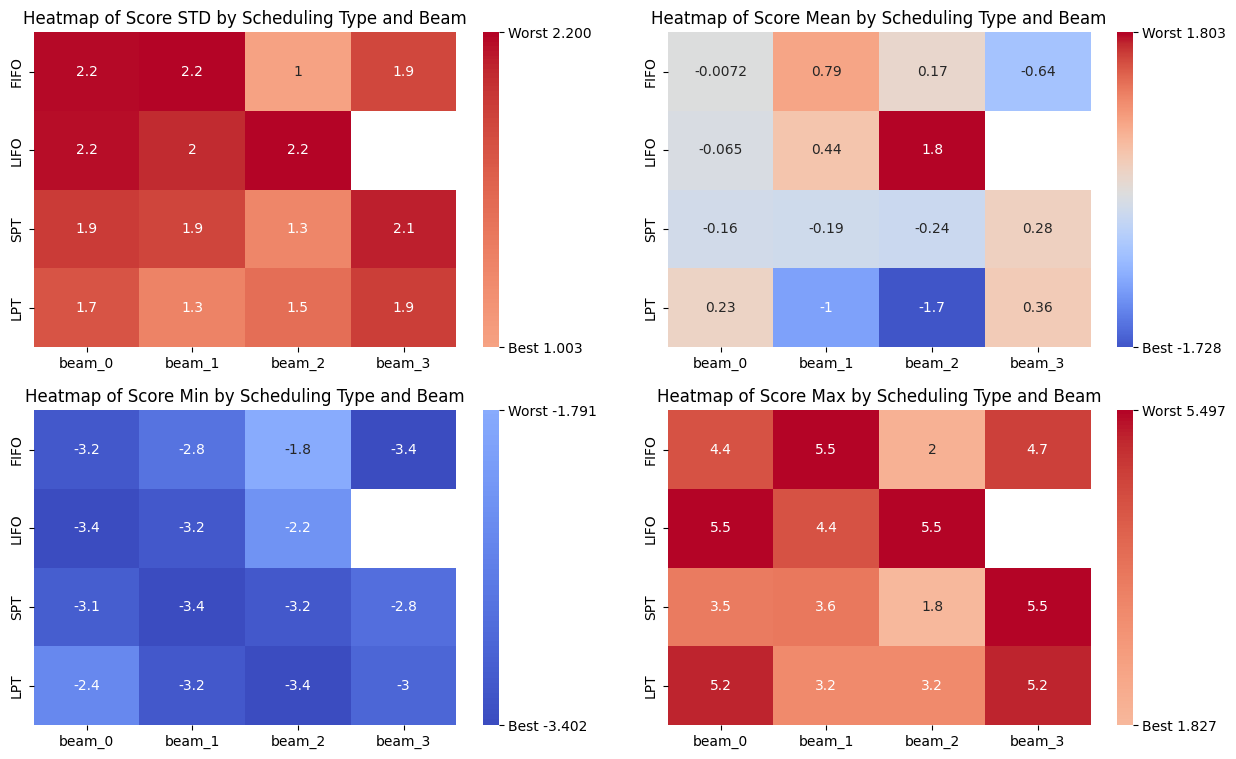

In [339]:
scheduling_types = ["FIFO", "LIFO", "SPT", "LPT"]
beams = ['beam_0', 'beam_1', 'beam_2', 'beam_3']

# Initialize arrays to store the sums and max values
score_std = np.zeros((len(scheduling_types), len(beams)))
score_mean= np.zeros((len(scheduling_types), len(beams)))
score_min = np.zeros((len(scheduling_types), len(beams)))
score_max = np.zeros((len(scheduling_types), len(beams)))

# Calculate the std and max values for each scheduling type and beam
for i, sched_type in enumerate(scheduling_types):
  for j, beam in enumerate(beams):
    scores = normalized_data[normalized_data[beam] == sched_type]['score']
    score_std[i, j] = scores.std()
    score_mean[i, j] = scores.mean()
    score_min[i, j] = scores.min()
    score_max[i, j] = scores.max()

# Create dataframes for the std and max values
score_df_std = pd.DataFrame(score_std, index=scheduling_types, columns=beams)
score_df_mean = pd.DataFrame(score_mean, index=scheduling_types, columns=beams)
score_df_min = pd.DataFrame(score_min, index=scheduling_types, columns=beams)
score_df_max = pd.DataFrame(score_max, index=scheduling_types, columns=beams)

# Plot heatmaps
fig, ax = plt.subplots(2, 2, figsize=(15, 9))

sns.heatmap(score_df_std, annot=True, cmap="coolwarm", center=0, ax=ax[0,0], cbar_kws={'ticks': [score_df_std.min().min(), score_df_std.max().max()]})
ax[0,0].set_title('Heatmap of Score STD by Scheduling Type and Beam')
cbar = ax[0,0].collections[0].colorbar
cbar.set_ticks([score_df_std.min().min(), score_df_std.max().max()])
cbar.set_ticklabels([f'Best {score_df_std.min().min():.3f}', f'Worst {score_df_std.max().max():.3f}'])

sns.heatmap(score_df_mean, annot=True, cmap="coolwarm", center=0, ax=ax[0,1], cbar_kws={'ticks': [score_df_mean.min().min(), score_df_mean.max().max()]})
ax[0,1].set_title('Heatmap of Score Mean by Scheduling Type and Beam')
cbar = ax[0,1].collections[0].colorbar
cbar.set_ticks([score_df_mean.min().min(), score_df_mean.max().max()])
cbar.set_ticklabels([f'Best {score_df_mean.min().min():.3f}', f'Worst {score_df_mean.max().max():.3f}'])

sns.heatmap(score_df_min, annot=True, cmap="coolwarm", center=0, ax=ax[1,0], cbar_kws={'ticks': [score_df_min.min().min(), score_df_min.max().max()]})
ax[1,0].set_title('Heatmap of Score Min by Scheduling Type and Beam')
cbar = ax[1,0].collections[0].colorbar
cbar.set_ticks([score_df_min.min().min(), score_df_min.max().max()])
cbar.set_ticklabels([f'Best {score_df_min.min().min():.3f}', f'Worst {score_df_min.max().max():.3f}'])

sns.heatmap(score_df_max, annot=True, cmap="coolwarm", center=0, ax=ax[1,1], cbar_kws={'ticks': [score_df_max.min().min(), score_df_max.max().max()]})
ax[1,1].set_title('Heatmap of Score Max by Scheduling Type and Beam')
cbar = ax[1,1].collections[0].colorbar
cbar.set_ticks([score_df_max.min().min(), score_df_max.max().max()])
cbar.set_ticklabels([f'Best {score_df_max.min().min():.3f}', f'Worst {score_df_max.max().max():.3f}'])

,missedPicks,missedDrops,score,bWorkload,beam_0,beam_1,beam_2,beam_3
137,-1.444639,-1.751320,-3.401758,-0.003184,LIFO,SPT,LPT,FIFO
156,-1.454407,-1.584689,-3.210593,0.166014,FIFO,LPT,SPT,FIFO
142,-1.378385,-1.637138,-3.205112,-0.555865,FIFO,LIFO,LPT,FIFO
134,-1.346108,-1.599078,-3.130390,-0.092454,SPT,LIFO,LPT,FIFO
138,-1.279854,-1.599078,-3.070762,0.025747,LIFO,LIFO,LPT,FIFO
133,-1.379234,-1.522957,-3.068859,1.033118,SPT,SPT,LPT,FIFO
141,-1.445488,-1.447300,-3.037699,-0.612964,FIFO,SPT,LPT,FIFO
9,-1.081518,-1.675199,-2.983604,-0.844121,LIFO,SPT,LPT,LPT
77,-1.180474,-1.485360,-2.844859,-1.789819,FIFO,SPT,LPT,SPT
5,-1.147347,-1.485360,-2.815044,-1.015893,SPT,SPT,LPT,LPT


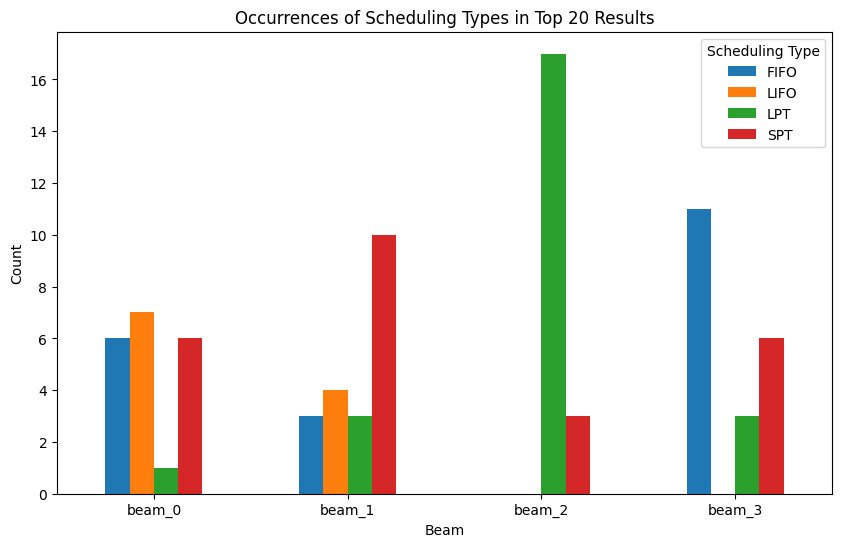

In [340]:
def highlight_min(s):
  if s.name == selected_variable:
    return [''] * len(s)
  if "beam" in s.name :
    return ['color: dodgerblue' if v == 'FIFO' else 'color: hotpink' if v == 'LIFO' else 'color: green' if v == 'SPT' else 'color: yellow' for v in s]
  if s.name in ("bWorkload"):
    is_min =  s > s.quantile(0.4)
    return ['color: red' if v else 'color: green' for v in is_min]
  is_min = s < s.quantile(0.15)
  return ['color: green' if v else '' for v in is_min]


# def highlight_min(s):
#   if s.name == selected_variable:
#     return [''] * len(s)
#   if "beam" in s.name :
#     return ['color: dodgerblue' if v == 'FIFO' else 'color: hotpink' if v == 'LIFO' else 'color: green' if v == 'SPT' else 'color: yellow' for v in s]
#   if s.name in ("bWorkload"):
#     is_min =  s < s.quantile(0.4)
#     return ['color: green' if v else '' for v in is_min]
#   is_min = s < s.quantile(0.1)
#   return ['color: green' if v else '' for v in is_min]
pd.set_option('display.max_rows', None)
# display(normalized_data.style.apply(highlight_min, axis=0))
# sorted_normalized_data = normalized_data.sort_values(by=['beam_1', 'score'], ascending=[ True, True])
sorted_normalized_data = normalized_data.sort_values(by=[ 'score'], ascending=[ True])
display(sorted_normalized_data[:20].style.apply(highlight_min, axis=0))

# Count the occurrences of each scheduling type for each beam in the top 20 results
top_20 = sorted_normalized_data[:20]
beam_counts = {beam: top_20[beam].value_counts() for beam in ["beam_0", "beam_1", "beam_2", "beam_3"]}

# Create a DataFrame for plotting
beam_counts_df = pd.DataFrame(beam_counts).fillna(0).T

# Plot the barplot
beam_counts_df.plot(kind='bar', figsize=(10, 6))
plt.title('Occurrences of Scheduling Types in Top 20 Results')
plt.xlabel('Beam')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Scheduling Type')
plt.show()

# regarder le nombre doccurence dans le top 10% des combinaisons
# regarder le nombre doccurence de combinaison dans le top 10
# faire un graph avec beam 0 beam 1 en x y, faire un cluster et voir sil y a un pattern, mettre en évidence les 10%
# trouver les mauvais cas pour chaque scénario

In [299]:
exportDF = sorted_normalized_data[:20]
# # add new column "scheduling" which concatenates the beam_0 to beam_3 together in a single string
# exportDF["scheduling"] = "["+exportDF["beam_0"]+", "+exportDF["beam_1"]+", "+exportDF["beam_2"]+", "+exportDF["beam_3"]+"]"

# exportDF = exportDF.round(3)
# rename beam_0 to beam_3 to b0 to b3
# exportDF = exportDF.rename(columns={"beam_0": "b0", "beam_1": "b1", "beam_2": "b2", "beam_3": "b3"})
exportDF = exportDF.rename(columns={"score":"Score","bWorkload":"BW","missedPicks":"MP","missedDrops":"MD","beam_0": "Beam0", "beam_1": "Beam1", "beam_2": "Beam2", "beam_3": "Beam3"})
# removes the column of row indices
# exportDF.drop("index")

# display(exportDF)
with pd.option_context("max_colwidth", 1000):
  print(exportDF.to_latex(index=False, float_format="%.3f"))

\begin{tabular}{rrrrllll}
\toprule
MP & MD & Score & BW & Beam0 & Beam1 & Beam2 & Beam3 \\
\midrule
-1.137 & -1.497 & -3.476 & -1.640 & SPT & LIFO & LPT & LPT \\
-1.573 & -1.536 & -3.440 & -0.453 & LPT & LIFO & LPT & FIFO \\
-1.149 & -1.396 & -3.360 & -1.625 & LPT & LIFO & LPT & SPT \\
-1.317 & -1.726 & -3.355 & -0.245 & SPT & SPT & LPT & LPT \\
-0.997 & -1.472 & -3.333 & -1.673 & LIFO & LIFO & LPT & LPT \\
-1.381 & -1.574 & -3.281 & -0.376 & LPT & SPT & LPT & SPT \\
-1.318 & -1.574 & -3.220 & -0.365 & LIFO & SPT & LPT & LPT \\
-1.315 & -1.142 & -3.199 & -1.613 & LIFO & LIFO & LPT & SPT \\
-1.276 & -1.155 & -3.121 & -1.467 & SPT & LIFO & LPT & SPT \\
-1.547 & -1.320 & -3.107 & -0.326 & SPT & LIFO & LPT & FIFO \\
-0.891 & -1.256 & -3.036 & -1.817 & LPT & LIFO & LPT & LPT \\
-1.137 & -1.383 & -3.031 & -0.869 & FIFO & SPT & LPT & LPT \\
-1.381 & -1.345 & -2.999 & -0.353 & LIFO & LIFO & LPT & FIFO \\
-1.186 & -1.045 & -2.856 & -1.337 & FIFO & LIFO & LPT & SPT \\
-1.158 & -1.418 & -2.820 & 

In [300]:
# for exportDF, count the number of occurences of each FIFO, LIFO, SPT, and LPT in all four beam columns
exportDF["Beam0"].value_counts(), exportDF["Beam1"].value_counts()  

(Beam0
 SPT     6
 LPT     6
 LIFO    4
 FIFO    4
 Name: count, dtype: int64,
 Beam1
 LIFO    11
 SPT      9
 Name: count, dtype: int64)

In [171]:
beam0Scheduling = ["FIFO", "LIFO", "SPT", "LPT"]
beam1Scheduling = ["LIFO", "SPT", "LPT"]
beam2Scheduling = ["LIFO", "SPT", "LPT"]
beam3Scheduling = ["FIFO", "SPT", "LPT"]
scheduling = np.array(np.meshgrid(beam0Scheduling, beam1Scheduling, beam2Scheduling, beam3Scheduling)).T.reshape(-1, 4).tolist()
temp1 = np.argwhere(np.array(np.meshgrid(beam0Scheduling, beam1Scheduling, beam2Scheduling, beam3Scheduling)).T.reshape(-1, 4).T[1] == "LPT")
temp2 = np.argwhere(np.array(np.meshgrid(beam0Scheduling, beam1Scheduling, beam2Scheduling, beam3Scheduling)).T.reshape(-1, 4).T[2] == "LPT")
# IDs to remove
ids_to_remove = np.intersect1d(temp1, temp2)
scheduling = np.delete(scheduling, ids_to_remove, axis=0)
nRuns = len(scheduling)
nRuns

96

In [145]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

for beam in ["beam_0", "beam_1", "beam_2", "beam_3"]:
    normalized_data[beam] = normalized_data[beam].astype("category")

In [158]:
np.where(normalized_data["tWorkload"] ==np.inf)
# # Select only numeric columns
# numeric_cols = normalized_data.select_dtypes(include=[np.number])

# # Find columns with infinite values
# inf_cols = numeric_cols.columns[numeric_cols.isin([np.inf, -np.inf]).any()]

# # Find row indices where there are infinite values
# inf_rows = numeric_cols.index[numeric_cols.isin([np.inf, -np.inf]).any(axis=1)]

# print("Columns with Inf values:", inf_cols.tolist())
# print("Rows with Inf values:", inf_rows.tolist())

# # Display the problematic rows
# print(normalized_data.loc[inf_rows])



(array([], dtype=int64),)

In [162]:
for col in ["beam_0", "beam_1", "beam_2", "beam_3"]:
    print(f"{col}: unique values = {normalized_data[col].unique()}")
    print(f"{col}: dtype = {normalized_data[col].dtype}")


beam_0: unique values = ['LPT', 'SPT', 'LIFO', 'FIFO']
Categories (4, object): ['FIFO', 'LIFO', 'LPT', 'SPT']
beam_0: dtype = category
beam_1: unique values = ['LPT', 'SPT', 'LIFO', 'FIFO']
Categories (4, object): ['FIFO', 'LIFO', 'LPT', 'SPT']
beam_1: dtype = category
beam_2: unique values = ['LPT', 'SPT', 'LIFO', 'FIFO']
Categories (4, object): ['FIFO', 'LIFO', 'LPT', 'SPT']
beam_2: dtype = category
beam_3: unique values = ['LPT', 'SPT', 'FIFO']
Categories (3, object): ['FIFO', 'LPT', 'SPT']
beam_3: dtype = category


In [ ]:
# Perform two-way ANOVA for `score`
model = smf.ols('score ~ C(beam_0) + C(beam_1) + C(beam_2) + C(beam_3)', data=normalized_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print results
print(anova_table)
# PR(>F) is the p-value
# If the p-value is less than 0.05, we reject the null hypothesis that the means of the groups are equal
# meaning they all have an impact
# The highest F-value is the most important feature
#

# calcul de coeff de correlation

               sum_sq     df          F        PR(>F)
C(beam_0)   23.120604    3.0   5.129522  1.989562e-03
C(beam_1)  285.990686    3.0  63.449709  4.881961e-28
C(beam_2)  110.516733    3.0  24.519171  2.376966e-13
C(beam_3)   38.920500    2.0  12.952316  5.553607e-06
Residual   270.441604  180.0        NaN           NaN
